In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import requests
import json
import base64

from spotify_creds import *

%matplotlib inline

In [46]:
# Setting up required variables for grabbing access token from Spotify
# Spotify requires client credentials to be in base64 encoded string

credentials = f'{client_id}:{client_secret}'
credbytes = credentials.encode('ascii')
credb64 = base64.b64encode(credbytes)
client_data = credb64.decode('ascii')

url = 'https://accounts.spotify.com/api/token'
headers = {'Authorization': 'Basic ' + client_data}
data = {'grant_type': 'client_credentials'}

In [156]:
# send POST request to Spotify API to receive token. Save token value

results = requests.post(url, headers=headers, data=data)
token = results.json()['access_token']
c_headers = {'Authorization': f"Bearer {token}"}

In [48]:
# Pulling artist data for The Avett Brothers

artist_1 = '196lKsA13K3keVXMDFK66q'

artist = requests.get(f'https://api.spotify.com/v1/artists/{artist_1}', headers=c_headers).json()
albums = requests.get(f'https://api.spotify.com/v1/artists/{artist_1}/albums', headers=c_headers).json()
# top_tracks = requests.get(f'https://api.spotify.com/v1/artists/{artist_1}/top-tracks/', headers=c_headers).json()
related_artists = requests.get(f'https://api.spotify.com/v1/artists/{artist_1}/related-artists', headers=c_headers).json()

In [49]:
# Explore what columns of data are included for related artists
related_artists['artists'][0].keys()

dict_keys(['external_urls', 'followers', 'genres', 'href', 'id', 'images', 'name', 'popularity', 'type', 'uri'])

In [50]:
# Pulling my personal playlist

playlist_id = '5mD2Iywg9yBf31NbpkGJeu'

playlist = requests.get(f'https://api.spotify.com/v1/playlists/{playlist_id}', headers=c_headers).json()

In [54]:
# Creating function to pull all songs from playist due to Spotify's limitation of only 100 tracks per pull

def get_tracks(playlist_id):
    # set offset at 0 to start and continue pulling 100 tracks at a time
    offset = 0
    tracks = []
    while True:
        content = requests.get(f'https://api.spotify.com/v1/playlists/{playlist_id}/tracks?offset={offset}&limit=100', headers=c_headers).json()
        try:
            tracks.extend(content['items'])
        except:
            # access token can time out and no data would be pulled to add to list. print error message if that is the case
            print(content)
            print("Cannot append")
            break
        # content has a 'next' value if there are more songs after the 100 songs pulled
        if content['next'] is not None:
            offset+= 100
        else:
            break
    return tracks

In [55]:
# save tracks from playlist in variable
songs = get_tracks(playlist_id)

In [79]:
# result is a list of nested dictionaries. json_normalize to put into pandas dataframe
raw_data = pd.json_normalize(songs)

In [81]:
print(raw_data.info())
raw_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1423 entries, 0 to 1422
Data columns (total 40 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   added_at                            1423 non-null   object
 1   is_local                            1423 non-null   bool  
 2   primary_color                       0 non-null      object
 3   added_by.external_urls.spotify      1423 non-null   object
 4   added_by.href                       1423 non-null   object
 5   added_by.id                         1423 non-null   object
 6   added_by.type                       1423 non-null   object
 7   added_by.uri                        1423 non-null   object
 8   track.album.album_type              1423 non-null   object
 9   track.album.artists                 1423 non-null   object
 10  track.album.available_markets       1423 non-null   object
 11  track.album.external_urls.spotify   1423 non-null   obje

,added_at,is_local,primary_color,added_by.external_urls.spotify,added_by.href,added_by.id,added_by.type,added_by.uri,track.album.album_type,track.album.artists,...,track.id,track.is_local,track.name,track.popularity,track.preview_url,track.track,track.track_number,track.type,track.uri,video_thumbnail.url
0,2013-11-24T16:34:11Z,False,None,https://open.spotify.com/user/1265916204,https://api.spotify.com/v1/users/1265916204,1265916204,user,spotify:user:1265916204,album,[{'external_urls': {'spotify': 'https://open.s...,...,0QOwak4SMvE1p2apLbDu8c,False,Warrant,45,https://p.scdn.co/mp3-preview/dcae44281dc954a6...,True,10,track,spotify:track:0QOwak4SMvE1p2apLbDu8c,None
1,2013-02-06T08:08:36Z,False,None,https://open.spotify.com/user/1265916204,https://api.spotify.com/v1/users/1265916204,1265916204,user,spotify:user:1265916204,album,[{'external_urls': {'spotify': 'https://open.s...,...,6CAG3rBGPTAinoqgVD7fBJ,False,The Greatest,0,None,True,1,track,spotify:track:6CAG3rBGPTAinoqgVD7fBJ,None
2,2013-02-06T17:13:41Z,False,None,https://open.spotify.com/user/1265916204,https://api.spotify.com/v1/users/1265916204,1265916204,user,spotify:user:1265916204,album,[{'external_urls': {'spotify': 'https://open.s...,...,10rA9ND4fP1MX0Nj0iobSp,False,Sea of Love,0,None,True,12,track,spotify:track:10rA9ND4fP1MX0Nj0iobSp,None
3,2013-02-06T17:13:49Z,False,None,https://open.spotify.com/user/1265916204,https://api.spotify.com/v1/users/1265916204,1265916204,user,spotify:user:1265916204,album,[{'external_urls': {'spotify': 'https://open.s...,...,2OohQDcRg4cS7xppz3tMCl,False,I Found A Reason,0,None,True,7,track,spotify:track:2OohQDcRg4cS7xppz3tMCl,None
4,2013-02-06T17:20:26Z,False,None,https://open.spotify.com/user/1265916204,https://api.spotify.com/v1/users/1265916204,1265916204,user,spotify:user:1265916204,album,[{'external_urls': {'spotify': 'https://open.s...,...,44VN2p3iC9mET5VLh4KtYv,False,Before You Cry,0,None,True,5,track,spotify:track:44VN2p3iC9mET5VLh4KtYv,None


In [88]:
raw_data.columns

Index(['added_at', 'is_local', 'primary_color',
       'added_by.external_urls.spotify', 'added_by.href', 'added_by.id',
       'added_by.type', 'added_by.uri', 'track.album.album_type',
       'track.album.artists', 'track.album.available_markets',
       'track.album.external_urls.spotify', 'track.album.href',
       'track.album.id', 'track.album.images', 'track.album.name',
       'track.album.release_date', 'track.album.release_date_precision',
       'track.album.total_tracks', 'track.album.type', 'track.album.uri',
       'track.artists', 'track.available_markets', 'track.disc_number',
       'track.duration_ms', 'track.episode', 'track.explicit',
       'track.external_ids.isrc', 'track.external_urls.spotify', 'track.href',
       'track.id', 'track.is_local', 'track.name', 'track.popularity',
       'track.preview_url', 'track.track', 'track.track_number', 'track.type',
       'track.uri', 'video_thumbnail.url'],
      dtype='object')

In [98]:
# Examining artist data. It is a list of dictionaries
raw_data['track.artists'][0]

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/7gP3bB2nilZXLfPHJhMdvc'},
  'href': 'https://api.spotify.com/v1/artists/7gP3bB2nilZXLfPHJhMdvc',
  'id': '7gP3bB2nilZXLfPHJhMdvc',
  'name': 'Foster The People',
  'type': 'artist',
  'uri': 'spotify:artist:7gP3bB2nilZXLfPHJhMdvc'}]

In [133]:
#Pulling out artist id and name from the lists of dictionaries to create new columns in the dataset

artist_list = []
artist_id_list = []

for i in range(len(raw_data)):
    artist_list.append(raw_data['track.artists'][i][0]['name'])
    artist_id_list.append(raw_data['track.artists'][i][0]['id'])

In [134]:
raw_data['artist_name'] = artist_list
raw_data['artist_id'] = artist_id_list

In [137]:
raw_data.head()

,added_at,is_local,primary_color,added_by.external_urls.spotify,added_by.href,added_by.id,added_by.type,added_by.uri,track.album.album_type,track.album.artists,...,track.name,track.popularity,track.preview_url,track.track,track.track_number,track.type,track.uri,video_thumbnail.url,artist_name,artist_id
0,2013-11-24T16:34:11Z,False,None,https://open.spotify.com/user/1265916204,https://api.spotify.com/v1/users/1265916204,1265916204,user,spotify:user:1265916204,album,[{'external_urls': {'spotify': 'https://open.s...,...,Warrant,45,https://p.scdn.co/mp3-preview/dcae44281dc954a6...,True,10,track,spotify:track:0QOwak4SMvE1p2apLbDu8c,None,Foster The People,7gP3bB2nilZXLfPHJhMdvc
1,2013-02-06T08:08:36Z,False,None,https://open.spotify.com/user/1265916204,https://api.spotify.com/v1/users/1265916204,1265916204,user,spotify:user:1265916204,album,[{'external_urls': {'spotify': 'https://open.s...,...,The Greatest,0,None,True,1,track,spotify:track:6CAG3rBGPTAinoqgVD7fBJ,None,Cat Power,6G7OerKc3eBO9sVkRNopFC
2,2013-02-06T17:13:41Z,False,None,https://open.spotify.com/user/1265916204,https://api.spotify.com/v1/users/1265916204,1265916204,user,spotify:user:1265916204,album,[{'external_urls': {'spotify': 'https://open.s...,...,Sea of Love,0,None,True,12,track,spotify:track:10rA9ND4fP1MX0Nj0iobSp,None,Cat Power,6G7OerKc3eBO9sVkRNopFC
3,2013-02-06T17:13:49Z,False,None,https://open.spotify.com/user/1265916204,https://api.spotify.com/v1/users/1265916204,1265916204,user,spotify:user:1265916204,album,[{'external_urls': {'spotify': 'https://open.s...,...,I Found A Reason,0,None,True,7,track,spotify:track:2OohQDcRg4cS7xppz3tMCl,None,Cat Power,6G7OerKc3eBO9sVkRNopFC
4,2013-02-06T17:20:26Z,False,None,https://open.spotify.com/user/1265916204,https://api.spotify.com/v1/users/1265916204,1265916204,user,spotify:user:1265916204,album,[{'external_urls': {'spotify': 'https://open.s...,...,Before You Cry,0,None,True,5,track,spotify:track:44VN2p3iC9mET5VLh4KtYv,None,Camera Obscura,5gInJ5P5gQnOKPM3SUEVFt


In [140]:
# Create a dataset with only necessary track information in order to combine with track audio feature data

raw_data_reduced = raw_data[['track.id', 'track.name', 'artist_id', 'artist_name', 'track.album.name', 'track.duration_ms', 'track.popularity', 'added_at']]

<AxesSubplot: ylabel='Frequency'>

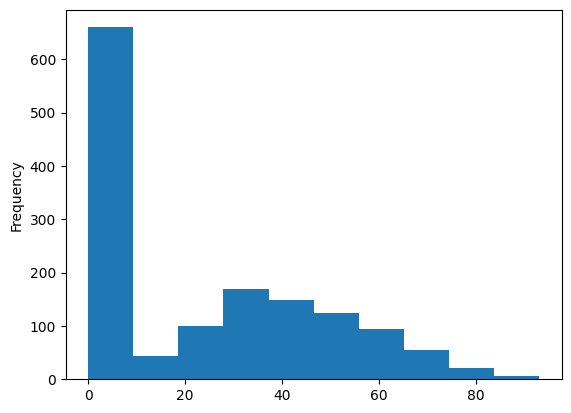

In [153]:
raw_data_reduced['track.popularity'].plot(kind='hist')

In [157]:
# Obtain track specific data
test_id = '0QOwak4SMvE1p2apLbDu8c'

test = requests.get(f'https://api.spotify.com/v1/audio-features/{test_id}', headers=c_headers).json()

In [158]:
test

{'danceability': 0.626,
 'energy': 0.823,
 'key': 0,
 'loudness': -5.46,
 'mode': 1,
 'speechiness': 0.0547,
 'acousticness': 0.0143,
 'instrumentalness': 0.00303,
 'liveness': 0.128,
 'valence': 0.297,
 'tempo': 120.012,
 'type': 'audio_features',
 'id': '0QOwak4SMvE1p2apLbDu8c',
 'uri': 'spotify:track:0QOwak4SMvE1p2apLbDu8c',
 'track_href': 'https://api.spotify.com/v1/tracks/0QOwak4SMvE1p2apLbDu8c',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0QOwak4SMvE1p2apLbDu8c',
 'duration_ms': 323067,
 'time_signature': 4}